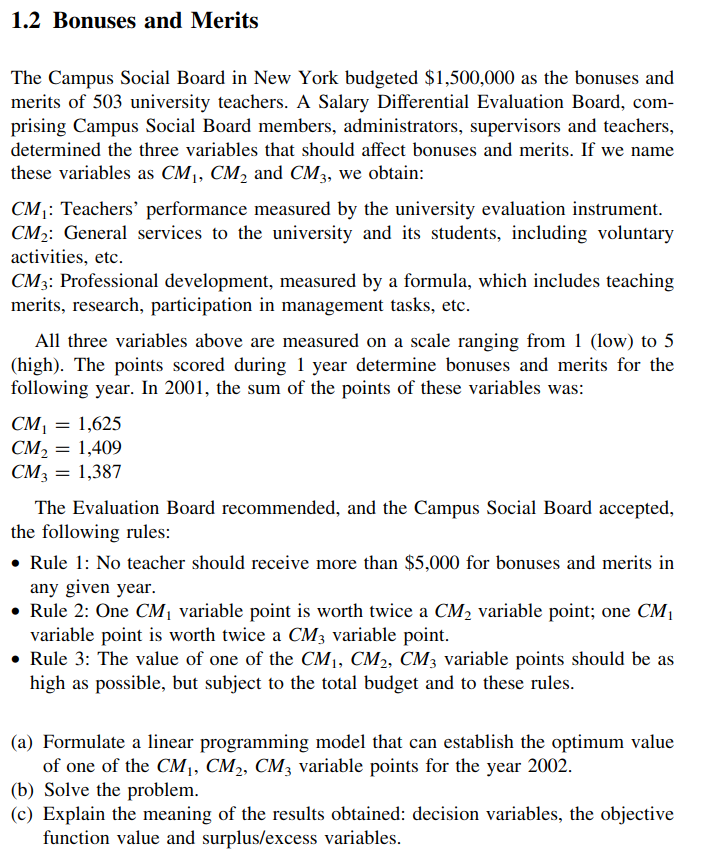

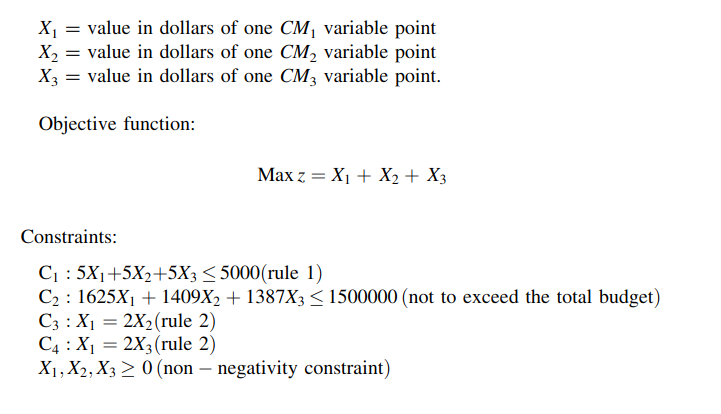

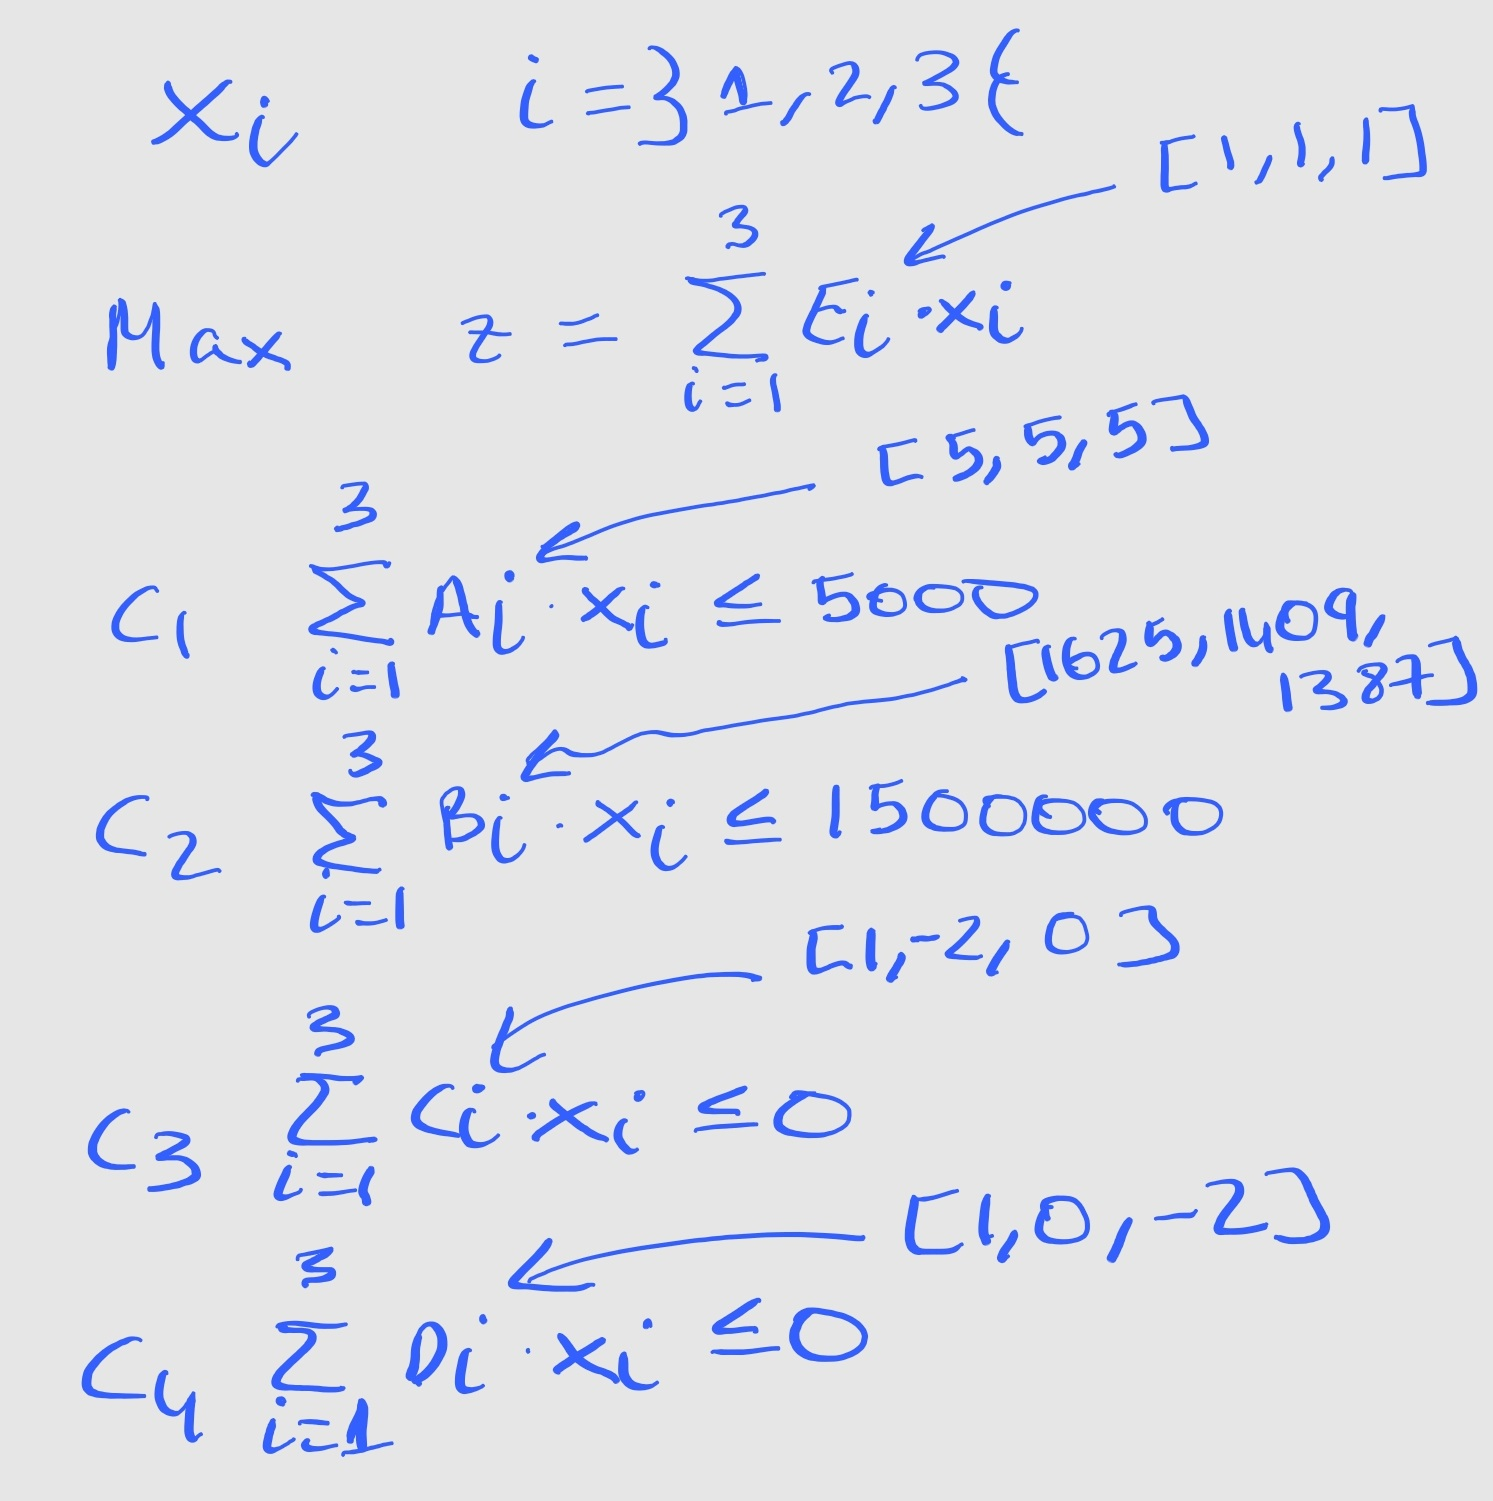

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 124.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
#Defining the model

model = pyo.ConcreteModel()

In [4]:
#Definition of sets

model.i = pyo.Set(initialize = ["X1","X2","X3"])

In [5]:
#Definition of parameters

  #param 1, max retribution

model.A = pyo.Param(model.i, initialize={"X1":5,"X2":5,"X3":5})
A=model.A

  #param 2, max budget

model.B = pyo.Param(model.i, initialize={"X1":1625,"X2":1409,"X3":1387})
B=model.B

  #param 3, rule 2

model.C = pyo.Param(model.i, initialize={"X1":1,"X2":-2,"X3":0})
C=model.C

  #param 4, rule 2

model.D = pyo.Param(model.i, initialize={"X1":1,"X2":0,"X3":-2})
D=model.D

  #param 5, objective function

model.E = pyo.Param(model.i, initialize={"X1":1,"X2":1,"X3":1})
E=model.E

In [6]:
#Decision variables

model.x=pyo.Var(model.i,within=pyo.NonNegativeReals)
x=model.x

In [10]:
#Objective rule and constraints

def Objective_rule(model):
  return sum(E[i]*x[i] for i in model.i)
model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.maximize)

def Constraint1(model):
  return sum(A[i]*x[i] for i in model.i) <= 5000
model.Const1 = pyo.Constraint(rule=Constraint1)

def Constraint2(model):
  return sum(B[i]*x[i] for i in model.i) <= 1500000
model.Const2 = pyo.Constraint(rule=Constraint2)

def Constraint3(model):
  return sum(C[i]*x[i] for i in model.i) == 0
model.Const3 = pyo.Constraint(rule=Constraint3)

def Constraint4(model):
  return sum(D[i]*x[i] for i in model.i) == 0
model.Const4 = pyo.Constraint(rule=Constraint4)

In [11]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [12]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 992.391663910023
  Upper bound: 992.391663910023
  Number of objectives: 1
  Number of constraints: 4
  Number of variables: 3
  Number of nonzeros: 10
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004450082778930664
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [13]:
print("objective function: ", model.Obj())
for i in model.i:
  print(x[i]())

objective function:  992.391663910024
496.195831955012
248.097915977506
248.097915977506
